#**Note:Please upload the texts files first before running the note book**


#Setting up the environment

In [88]:
import random
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import Counter
from random import randrange
from random import sample
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import feature_extraction, manifold
import seaborn as sn
from sklearn.metrics import silhouette_score, cohen_kappa_score
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from sklearn.metrics.cluster import contingency_matrix
import glob
import os
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.utils import shuffle
import time 
import multiprocessing
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
import wordcloud
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
random.seed(555)


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Importing Data

In [89]:

books = []
path=r'/content/'
def read_all_text_in_folder(path):
    os.chdir(path)
    myFiles = glob.glob('*.txt')

    for i in myFiles:
        finalpath=path+i
        with open (finalpath) as fo:
            data = fo.read()
            
        books.append(data)


read_all_text_in_folder(path)
books

['Title: The Meaning of Truth\n\nAuthor: William James\n\n\nTHE MEANING OF TRUTH\n\nA SEQUEL TO \'PRAGMATISM\'\n\nBy William James\n\n\n\n\n\nPREFACE\n\nTHE pivotal part of my book named Pragmatism is its account of the\nrelation called \'truth\' which may obtain between an idea (opinion,\nbelief, statement, or what not) and its object. \'Truth,\' I there say,\n\'is a property of certain of our ideas. It means their agreement,\nas falsity means their disagreement, with reality. Pragmatists and\nintellectualists both accept this definition as a matter of course.\n\n\'Where our ideas [do] not copy definitely their object, what does\nagreement with that object mean? ... Pragmatism asks its usual question.\n"Grant an idea or belief to be true," it says, "what concrete difference\nwill its being true make in any one\'s actual life? What experiences\n[may] be different from those which would obtain if the belief were\nfalse? How will the truth be realized? What, in short, is the truth\'s\nca

#Preprocessing and Data Cleansing


In [90]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
#from nltk import Stemmer
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [91]:
stemmer = PorterStemmer()
def lemmatize_stemming(text): #lemmatize function
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

#This function parses the text that we imported along with the number of partitions (Rows) and number of words per each partition (W)
#We can change these numbers each time to evaluate the performance of the classifiers  

def get_df(texts,Rows,W): #function that takes the list of books and returns a df with 200 cleaned samples for each book
  filtered_sentences = []
  labels = []
  for book in books: # get the title of each book to be used as label
    x = book.index('\n')
    labels.append(book[7:x]) #parse the title of the book 
  label = []
  for i in range(len(texts)):
    text = texts[i] #get the book
    text = text.lower()
    tokenized_word=nltk.word_tokenize(text) #tokenize the words
    cleaned_words = [word for word in tokenized_word if word.isalnum()] #clean the words from symbols and keep alphanumeric characters instead of using regex
    filtered_words=[]
    for w in cleaned_words:# Clean the words yet again from stop words.
        if w not in stop_words:
            filtered_words.append(w)
    for s in range(len(filtered_words)):
      filtered_words[s] = lemmatize_stemming(filtered_words[s])
    random_numbers = []
    for c in range(Rows): # generate this loop 200 times for each book to take 200 samples from ech book
      while True: # To stay in loop and change random number if it was used before
        x = randrange(0,len(filtered_words)-W) #generate random number from 0 to length of string - W (to be able to take last W amount of words)
        if (x not in random_numbers): # make sure the number was not used before
          random_numbers.append(x) #add random number to list
          filtered_sentences.append(' '.join(filtered_words[x:x+W])) #add W amount of words from random position to random position + W.
          label.append(labels[i]) #append the label of the book
          break
        
  print(len(filtered_sentences))
  print(len(filtered_words))
  df = pd.DataFrame({'label': label, 'sample': filtered_sentences})
  
  return df, filtered_sentences
df, s = get_df(books,200,150) #Changing the number of partitions and the number of words in every partition will change the whole performance of the experiment.
print(len(s[0]))
print(len(nltk.word_tokenize((s[0]))))


1000
46199
996
150


In [92]:
df

,label,sample
0,The Meaning of Truth,oppon might say intellect kind slush make repl...
1,The Meaning of Truth,function grow wish account shall true whether ...
2,The Meaning of Truth,india sit exactli mean say know tiger precis f...
3,The Meaning of Truth,beyond sound know realiti faintest fragmentari...
4,The Meaning of Truth,men seek spread belief awaken imit infect othe...
...,...,...
995,Indiana,white hand buri black hair indiana impuls tri ...
996,Indiana,indulg oblig mentor accommod passion interest ...
997,Indiana,accomplish play passion well deceiv shame upon...
998,Indiana,care protect humili certain overwhelm must giv...


#Keeping the document and the label in variables

In [93]:
# sample = df.loc[:,'sample']
# sample_x = sample.values

# label = df.loc[:,'label']
# label_x = label.values
# # X_train, X_test, y_train, y_test = train_test_split(sample_x, label_x, test_size=0.5, random_state=42)
X_train= df["sample"]
y_train = df["label"]

#Feature Engineering trnasforming text data to BOW, TF-IDF, n-gram LDA nad Doc2Vec

## BOW transformation

In [94]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape
#X_test_counts= count_vect.transform(X_test)
#X_test_counts.shape
# #print(X_train_counts)

(1000, 7746)

## TF-IDF Transformation

In [95]:
#vectoriztion before claculating the TF-IDF 
vectorizer = TfidfVectorizer()
X_train_counts= vectorizer.fit_transform(X_train)
#claculating the TF-IDF values
tfidf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tfidf = tfidf_transformer.transform(X_train_counts)
X_train_tfidf.shape

#Transforming the test set as well
#X_test_tfidf = tfidf_transformer.transform(X_test_counts)
#X_test_tfidf.shape

#getting the keywords frequency
# dict(zip(vectorizer.get_feature_names(), X_train_tfidf.toarray()[0]))


(1000, 7746)

## n-gram Transformation

In [96]:
count_vect_ngram = CountVectorizer(ngram_range=(3,3))
X_train_ngram = count_vect_ngram.fit_transform(X_train)
X_train_ngram.shape
#X_test_ngram = count_vect_ngram.transform(X_test)
#X_test_ngram.shape

(1000, 83966)

##LDA transformation

In [97]:

#vectoriztion before claculating the TF-IDF 
vectorizer = TfidfVectorizer()
X_train_counts= vectorizer.fit_transform(X_train)
#claculating the TF-IDF values
lda = LatentDirichletAllocation(n_components=30,random_state=123)
lda.fit(X_train_counts)
X_train_LDA = lda.transform(X_train_counts)

#Transforming the test set as well
#X_test_LDA = lda.transform(X_test_counts)


# getting the keywords frequency
oo=dict(zip(vectorizer.get_feature_names(), X_train_tfidf.toarray()[0]))


##Doc2Vec transformation

In [98]:
df1=df
df1.index= range(1000)
df1['sample'].apply(lambda x: len(x.split(' '))).sum()

150000

In [99]:

train, test = train_test_split(df1, test_size=0.3, random_state=42)


def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['sample']), tags=[r.label]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['sample']), tags=[r.label]), axis=1)

In [100]:
cores = multiprocessing.cpu_count()

In [101]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 700/700 [00:00<00:00, 557435.50it/s]


In [102]:
for epoch in range(30):
    model_dbow.train(shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 700/700 [00:00<00:00, 188508.04it/s]


In [103]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors
    def vec_for_learning(model, tagged_docs):
      sents = tagged_docs.values
      targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
      return targets, regressors

In [104]:
y_train_D2V, X_train_D2V = vec_for_learning(model_dbow, train_tagged)
y_test_D2V, X_test_DV = vec_for_learning(model_dbow, test_tagged)

#Kmeans Clustering

In [105]:

def kmeans_reduction(reduction, x, y, flag = None): #function that uses kmeans to cluster the data based on three types of reduction techniques.
  random.seed(555)
  
  if reduction == "tsne":
    tsne = TSNE(n_components=2, random_state=0)
    X = tsne.fit_transform(x)
    plt.scatter(X[:,0], X[:,1])
    plt.title("t-sne scatter")
    plt.show()
  if reduction == "normal":
    X = x
  if reduction == "svd":
    svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
    X = svd.fit_transform(x)
    plt.scatter(X[:,0], X[:,1])
    plt.title("SVD scatter")
    plt.show()
  

  kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=1000, n_init=10, random_state=0)
  pred_y = kmeans.fit_predict(X)
  if reduction != "normal": 
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='red')
    plt.title('Clusters')
    plt.show()

  labels = kmeans.labels_
  print("\n Silhouette Score: ", silhouette_score(X, labels, metric='euclidean') )


  y= pd.factorize(y)
  correcting_class= pd.DataFrame({"label":pred_y,"class":y[0]})

  lll=[]
  for i in range(5):
    lll.append(correcting_class.loc[correcting_class["class"]==i])
  for i in range(5):
    lll[i]["class"]=int(max(lll[i]["label"].mode()))

  class_laabel_df=pd.DataFrame()
  for I in range(5):
    class_laabel_df=pd.concat([class_laabel_df, lll[I]], axis=0) 
  class_laabel_df

  print("\n Contingency Matrix: \n", contingency_matrix(class_laabel_df["class"], class_laabel_df["label"]))
  print("\n Kappa score: " ,cohen_kappa_score(class_laabel_df["class"], class_laabel_df["label"]))
  print("\n\n")
  
  #print("Contingency Matrix: \n", contingency_matrix(pred_y, y_train))
  return class_laabel_df

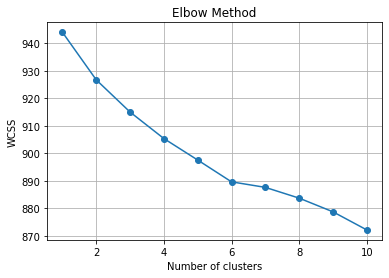

In [106]:
wcss = []
for i in range(1, 11): #plot elbow method to find best k -> number of cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=6, random_state=0)
    kmeans.fit(X_train_counts)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


##Kmeans Clustering using BOW

### Without Feature Reduction:

In [107]:
kmeans_reduction("normal", X_train_counts, y_train)


 Silhouette Score:  0.024170915779075174

 Contingency Matrix: 
 [[ 28 172   0   0   0]
 [  0   1 197   0   2]
 [  0   2   0 197   1]
 [  0  15   8   0 377]]

 Kappa score:  0.921875





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
995,2,2
996,2,2
997,2,2
998,2,2


### SVD:

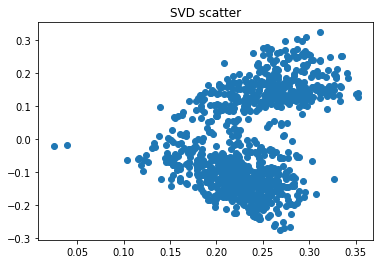

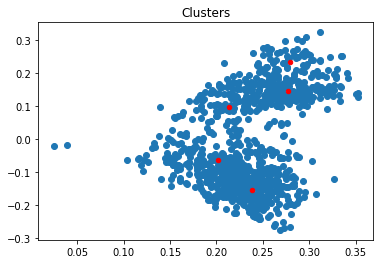


 Silhouette Score:  0.4066026738174163

 Contingency Matrix: 
 [[133  13   0  26  28]
 [  0 103  84  13   0]
 [  0 155 244   1   0]
 [ 61   1   0  83  55]]

 Kappa score:  0.4181091877496671





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,3,3
1,3,3
2,3,3
3,0,3
4,4,3
...,...,...
995,2,2
996,2,2
997,2,2
998,2,2


In [108]:
kmeans_reduction("svd", X_train_counts, y_train)

###T-SNE:

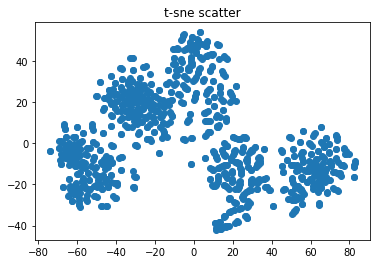

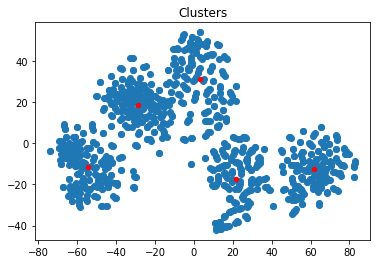


 Silhouette Score:  0.52219236

 Contingency Matrix: 
 [[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   2 187   0  11]
 [  0   2   1 197   0]
 [  0   2   1   0 197]]

 Kappa score:  0.97625





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
995,4,4
996,4,4
997,4,4
998,4,4


In [109]:
kmeans_reduction("tsne", X_train_counts, y_train)

##Kmeans Clustering using TF-IDF

### Without Feature Reduction:

In [110]:
kmeans_reduction("normal", X_train_tfidf, y_train)


 Silhouette Score:  0.024170915779075177

 Contingency Matrix: 
 [[ 28 172   0   0   0]
 [  0   1 197   0   2]
 [  0   2   0 197   1]
 [  0  15   8   0 377]]

 Kappa score:  0.921875





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
995,2,2
996,2,2
997,2,2
998,2,2


### SVD:

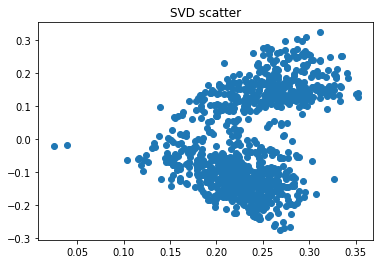

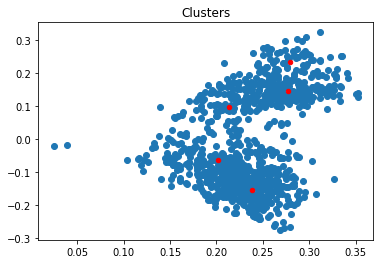


 Silhouette Score:  0.40660267381741655

 Contingency Matrix: 
 [[133  13   0  26  28]
 [  0 103  84  13   0]
 [  0 155 244   1   0]
 [ 61   1   0  83  55]]

 Kappa score:  0.4181091877496671





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,3,3
1,3,3
2,3,3
3,0,3
4,4,3
...,...,...
995,2,2
996,2,2
997,2,2
998,2,2


In [111]:
kmeans_reduction("svd", X_train_tfidf, y_train)

### T-SNE

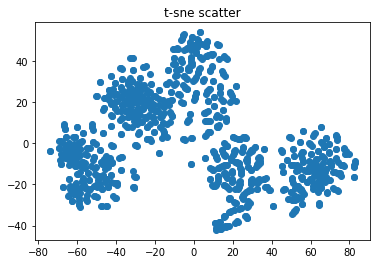

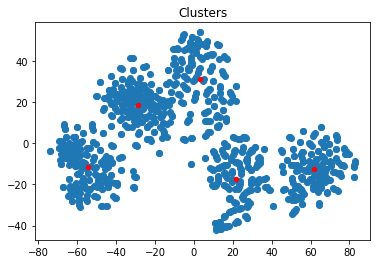


 Silhouette Score:  0.52219236

 Contingency Matrix: 
 [[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   2 187   0  11]
 [  0   2   1 197   0]
 [  0   2   1   0 197]]

 Kappa score:  0.97625





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
995,4,4
996,4,4
997,4,4
998,4,4


In [112]:
kmeans_reduction("tsne", X_train_tfidf, y_train)

##Kmeans Clustering using n-gram

### Without Feature Reduction:

In [113]:
kmeans_reduction("normal", X_train_ngram, y_train)


 Silhouette Score:  0.008594092503700251

 Contingency Matrix: 
 [[ 10   4 971   8   7]]

 Kappa score:  0.0





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
995,2,2
996,2,2
997,2,2
998,2,2


### SVD:

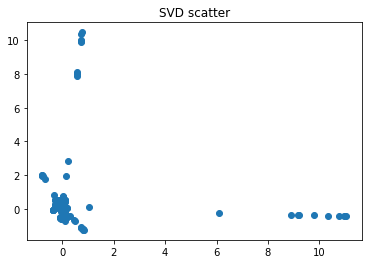

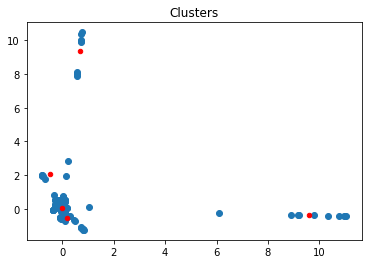


 Silhouette Score:  0.8227772755351176

 Contingency Matrix: 
 [[926   9   8   7  50]]

 Kappa score:  0.0





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,0,0
1,0,0
2,0,0
3,4,0
4,0,0
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


In [114]:
kmeans_reduction("svd", X_train_ngram, y_train)

### T-SNE:

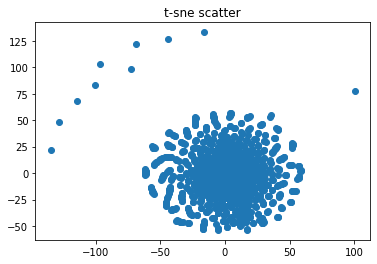

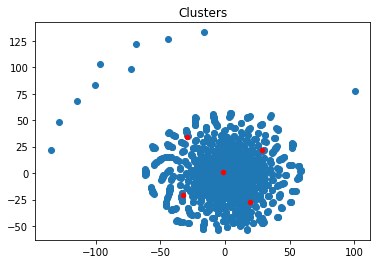


 Silhouette Score:  0.3393772

 Contingency Matrix: 
 [[ 95   3  15   5  82]
 [ 53 188  59  70  30]
 [  3  67  97   0  33]
 [ 18  45   8 123   6]]

 Kappa score:  0.3542099792099792





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,2,2
1,4,2
2,2,2
3,2,2
4,2,2
...,...,...
995,3,3
996,1,3
997,1,3
998,3,3


In [115]:
kmeans_reduction("tsne", X_train_ngram, y_train)

##Kmeans Clustering using LDA

### Without Feature Reduction:

In [116]:
kmeans_reduction("normal", X_train_LDA, y_train)


 Silhouette Score:  0.15455314746366003

 Contingency Matrix: 
 [[114 182  75 558  71]]

 Kappa score:  0.0





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,3,3
1,3,3
2,3,3
3,3,3
4,4,3
...,...,...
995,1,3
996,3,3
997,0,3
998,3,3


### SVD:

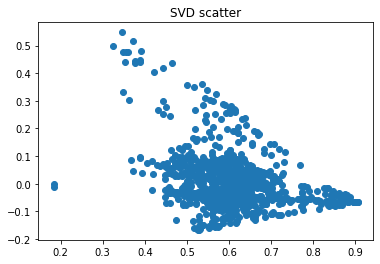

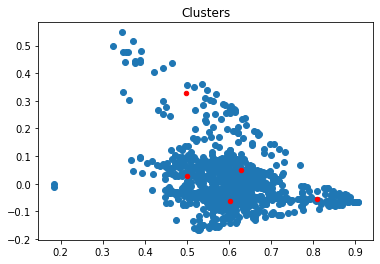


 Silhouette Score:  0.37768751170118947

 Contingency Matrix: 
 [[284  36  69 102 109]
 [ 83  17  40 109 151]]

 Kappa score:  0.16395383249482087





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,3,0
1,3,0
2,3,0
3,0,0
4,1,0
...,...,...
995,2,4
996,3,4
997,0,4
998,4,4


In [117]:
kmeans_reduction("svd", X_train_LDA, y_train)

### T-SNE:

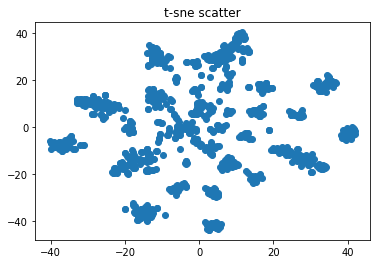

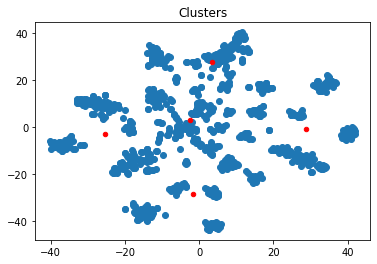


 Silhouette Score:  0.40838206

 Contingency Matrix: 
 [[ 63  23  54  33  27]
 [ 35  56  37  36  36]
 [ 46  21  60  50  23]
 [ 63  91  58  74 114]]

 Kappa score:  0.11470072627097405





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,2,4
1,4,4
2,1,4
3,1,4
4,3,4
...,...,...
995,2,4
996,0,4
997,4,4
998,4,4


In [118]:
kmeans_reduction("tsne", X_train_LDA, y_train)

##Kmeans Clustering using Doc2vec

### Without Feature Reduction:

In [119]:
kmeans_reduction("normal", X_train_D2V, y_train_D2V)


 Silhouette Score:  0.28288388

 Contingency Matrix: 
 [[ 46  32   9  33  27]
 [ 27  38   8  36  34]
 [ 27   5 162  27  53]
 [ 11  40  10  45  30]]

 Kappa score:  0.2588201182574118





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,0,1
1,1,1
2,1,1
3,1,1
7,0,1
...,...,...
690,2,2
692,2,2
694,2,2
695,2,2


### SVD:

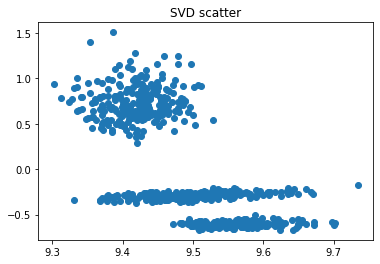

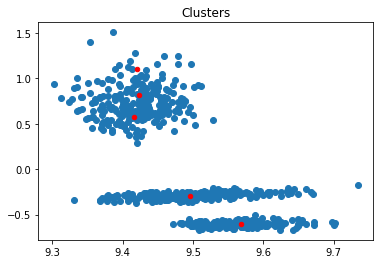


 Silhouette Score:  0.6546734

 Contingency Matrix: 
 [[162   5  80  26   1]
 [ 27 106 175  89  29]]

 Kappa score:  0.22902810816059027





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,2,2
1,1,2
2,1,2
3,4,2
7,2,2
...,...,...
690,0,0
692,0,0
694,0,0
695,0,0


In [120]:
kmeans_reduction("svd", X_train_D2V, y_train_D2V)

### T-SNE:

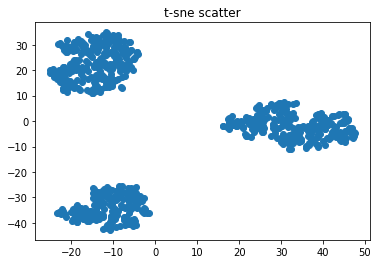

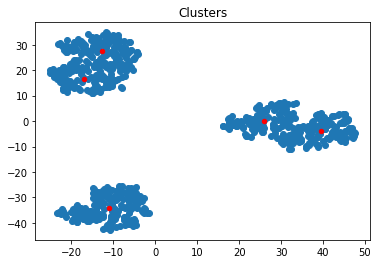


 Silhouette Score:  0.5513204

 Contingency Matrix: 
 [[ 55   9  30  35  18]
 [ 41 162  27   5  39]
 [ 49  18  73  86  53]]

 Kappa score:  0.2720271385348859





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,0,3
1,3,3
2,3,3
3,3,3
7,0,3
...,...,...
690,1,1
692,1,1
694,1,1
695,1,1


In [121]:
kmeans_reduction("tsne", X_train_D2V, y_train_D2V)

#Hierarchical Clustering

In [122]:


def hc_reduction(reduction, x, y, flag = None): #function that uses hierarchical clustering to cluster the data based on three types of reduction techniques.
  random.seed(555)
  if reduction == "LDA":
    LDA = LinearDiscriminantAnalysis(n_components= 2)
    if flag == None:
      X = LDA.fit_transform(x.toarray(),y)
    else: X = LDA.fit_transform(x,y)
    plt.scatter(X[:,0], X[:,1])
    plt.title("LDA scatter")
    plt.show()
  if reduction == "tsne":
    tsne = TSNE(n_components=2, random_state=0)
    X = tsne.fit_transform(x)
    plt.scatter(X[:,0], X[:,1])
    plt.title("t-sne scatter")
    plt.show()
  if reduction == "normal":
    if flag == None:
      X = x.toarray()
    else: X = x
  if reduction == "svd":
    svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
    X = svd.fit_transform(x)
    plt.scatter(X[:,0], X[:,1])
    plt.title("SVD scatter")
    plt.show()

  if reduction != "normal": 
    plt.figure(figsize=(10, 7))  
    plt.title("Dendrograms")  
    dend = shc.dendrogram(shc.linkage(X, method='ward'))
    plt.show()

  hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
  pred_y = hc.fit_predict(X)


  labels = hc.labels_
  print("\n Silhouette Score: ", silhouette_score(X, labels, metric='euclidean') )
   
 #This part of the function matches between the cluster label and the original classs by identifing the maximum number of records that hav the same class in each label
 #Then we change the number that represents that class with the same number that represent the label so that we will be able to calculate the kappa and the contengincy matrix
  y= pd.factorize(y)
  correcting_class= pd.DataFrame({"label":pred_y,"class":y[0]})

  lll=[]
  for i in range(5):
    lll.append(correcting_class.loc[correcting_class["class"]==i])
  for i in range(5):
    lll[i]["class"]=max((lll[i]["label"].mode()))

  class_laabel_df=pd.DataFrame()
  for I in range(5):
    class_laabel_df=pd.concat([class_laabel_df, lll[I]], axis=0) 
  class_laabel_df

  print("\n Contingency Matrix: \n", contingency_matrix(class_laabel_df["class"], class_laabel_df["label"]))
  print("\n Kappa score: " ,cohen_kappa_score(class_laabel_df["class"], class_laabel_df["label"]))
  print("\n\n")

##Hierarchal Clustering using BOW

### Without Feature Reduction:

In [123]:
hc_reduction("normal", X_train_counts, y_train)


 Silhouette Score:  0.02335177273793631

 Contingency Matrix: 
 [[400   0   0   0   0]
 [  4 176   4   0  16]
 [  3   3 194   0   0]
 [ 10   0   0 190   0]]

 Kappa score:  0.9444290080577938





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### SVD:

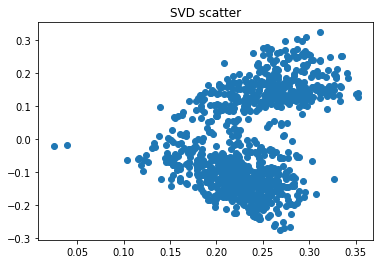

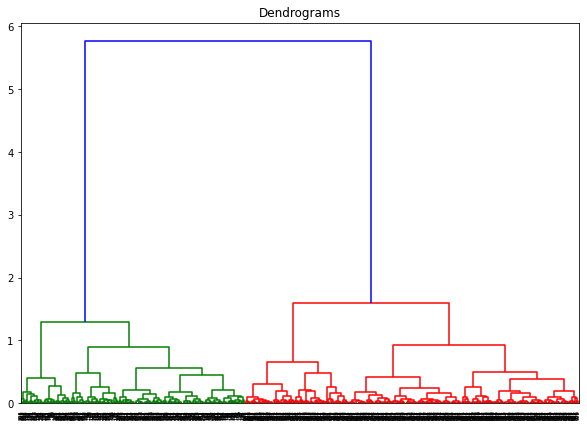


 Silhouette Score:  0.3243305416837204

 Contingency Matrix: 
 [[293   0  16  91   0]
 [  1 110  39   0  50]
 [ 17  47  73   0  63]
 [  0  53  57   0  90]]

 Kappa score:  0.42592592592592593





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [124]:
hc_reduction("svd", X_train_counts, y_train)

### T-SNE:

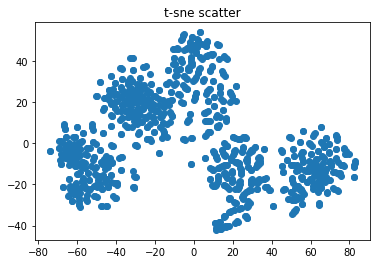

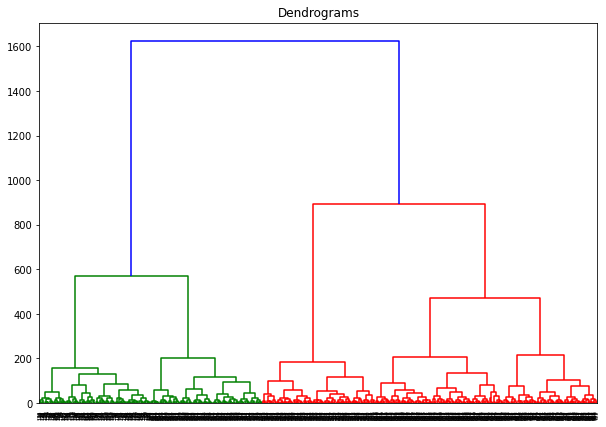


 Silhouette Score:  0.51542

 Contingency Matrix: 
 [[168  32   0   0   0]
 [  0 198   2   0   0]
 [  0   0 200   0   0]
 [  1   0   0 199   0]
 [  0   0   0   0 200]]

 Kappa score:  0.95625





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [125]:
hc_reduction("tsne", X_train_counts, y_train)

##Hierarchal Clustering using TF-IDF

### Without Feature Reduction:

In [126]:
hc_reduction("normal", X_train_tfidf, y_train)


 Silhouette Score:  0.023351772737936316

 Contingency Matrix: 
 [[400   0   0   0   0]
 [  4 176   4   0  16]
 [  3   3 194   0   0]
 [ 10   0   0 190   0]]

 Kappa score:  0.9444290080577938





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### SVD:

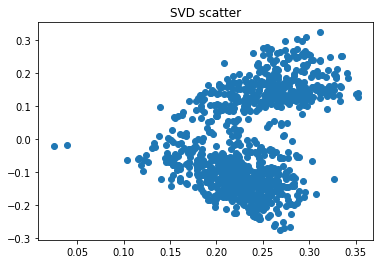

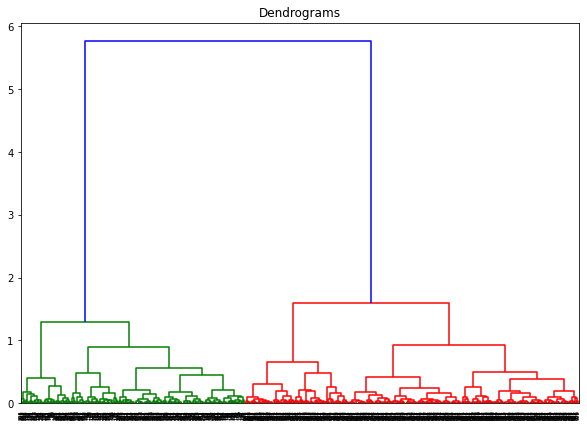


 Silhouette Score:  0.32433054168372055

 Contingency Matrix: 
 [[293   0  16  91   0]
 [  1 110  39   0  50]
 [ 17  47  73   0  63]
 [  0  53  57   0  90]]

 Kappa score:  0.42592592592592593





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [127]:
hc_reduction("svd", X_train_tfidf, y_train)

### T-SNE:

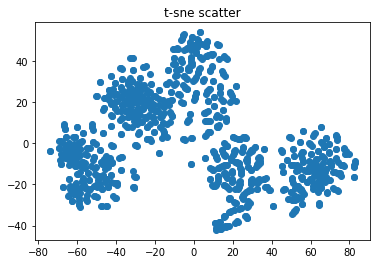

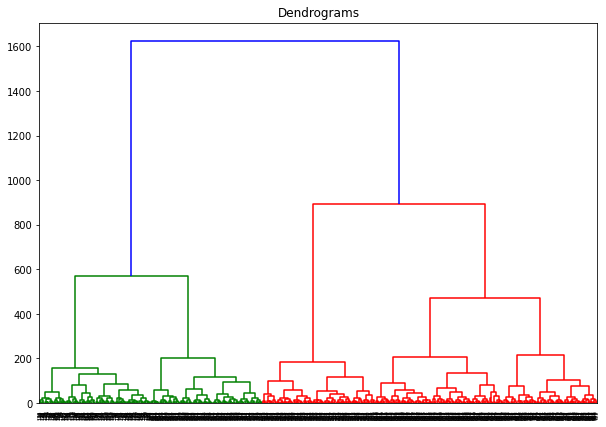


 Silhouette Score:  0.51542

 Contingency Matrix: 
 [[168  32   0   0   0]
 [  0 198   2   0   0]
 [  0   0 200   0   0]
 [  1   0   0 199   0]
 [  0   0   0   0 200]]

 Kappa score:  0.95625





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [128]:
hc_reduction("tsne", X_train_tfidf, y_train)

##Hierarchal Clustering using n-gram

### Without Feature Reduction:

In [129]:
hc_reduction("normal", X_train_ngram, y_train)


 Silhouette Score:  0.010289139473876269

 Contingency Matrix: 
 [[969   8   8   9   6]]

 Kappa score:  0.0





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### SVD:

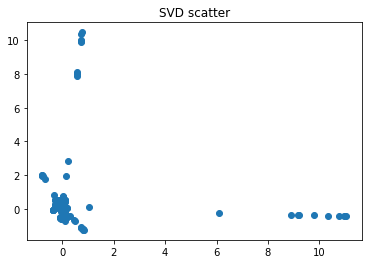

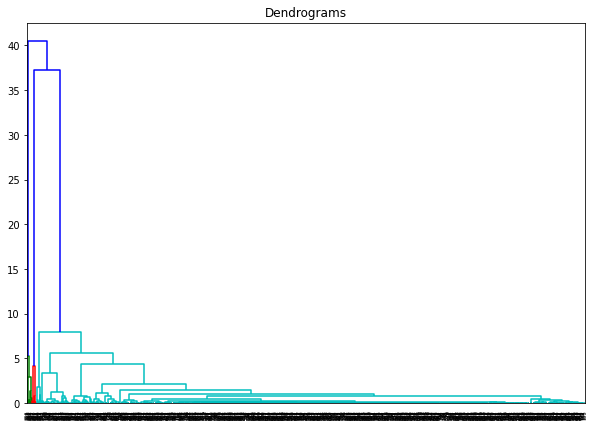


 Silhouette Score:  0.8156278658687535

 Contingency Matrix: 
 [[  9 921   8   7  55]]

 Kappa score:  0.0





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [130]:
hc_reduction("svd", X_train_ngram, y_train)

### T-SNE:

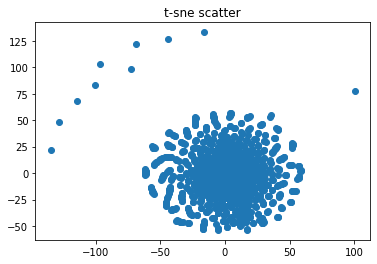

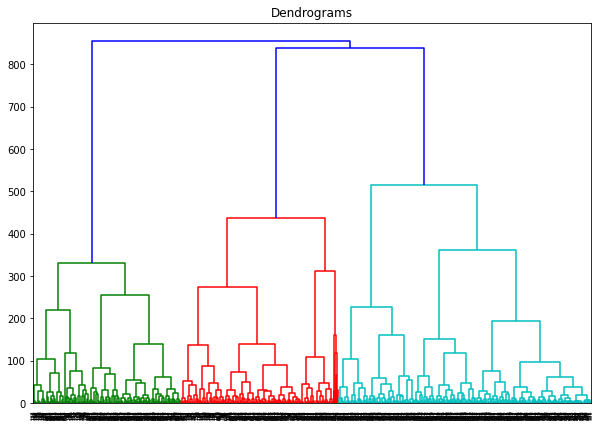


 Silhouette Score:  0.28112805

 Contingency Matrix: 
 [[240 112   6  23  19]
 [  3  20  58 101  18]
 [ 73 133   3  13 178]]

 Kappa score:  0.3672717705866878





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [131]:
hc_reduction("tsne", X_train_ngram, y_train)

##Hierarchal Clustering using LDA

### Without Feature Reduction:

In [132]:
hc_reduction("normal", X_train_LDA, y_train, 1)


 Silhouette Score:  0.13526064875890847

 Contingency Matrix: 
 [[650  78  78 109  85]]

 Kappa score:  0.0





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### SVD:

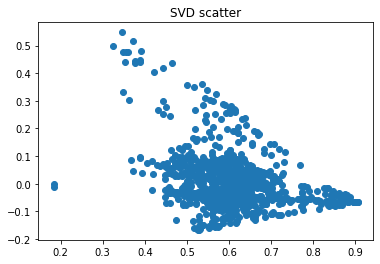

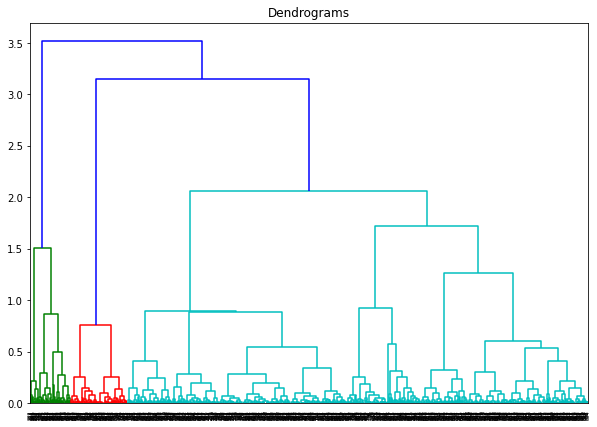


 Silhouette Score:  0.32728541212922835

 Contingency Matrix: 
 [[ 25 182  37 101  55]
 [ 47 119  64 294  76]]

 Kappa score:  0.18456271397447865





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [133]:
hc_reduction("svd", X_train_LDA, y_train)

### T-SNE:

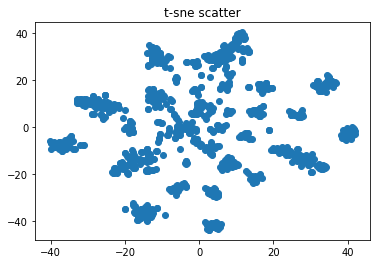

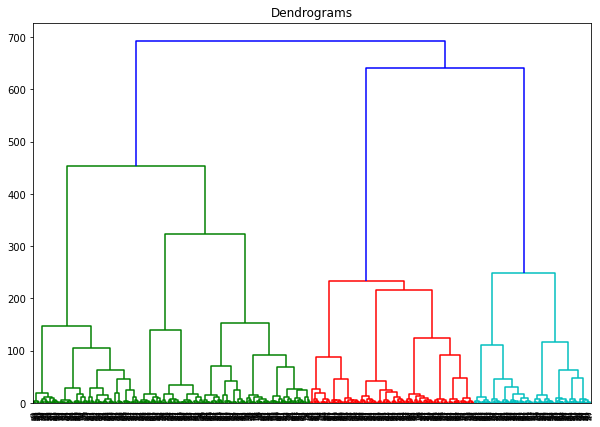


 Silhouette Score:  0.38929498

 Contingency Matrix: 
 [[172 163 253 130  82]
 [ 37  29  41  59  34]]

 Kappa score:  0.05364511691884455





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [134]:
hc_reduction("tsne", X_train_LDA, y_train)

##Hierarchal Clustering using Doc2vec

### Without Feature Reduction:

In [135]:
hc_reduction("normal", X_train_D2V, y_train_D2V, 1)


 Silhouette Score:  0.27683255

 Contingency Matrix: 
 [[ 44  33  10  41   8]
 [ 72  89  17  67  45]
 [  5  71 162  27   9]]

 Kappa score:  0.22496090631732035





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### SVD:

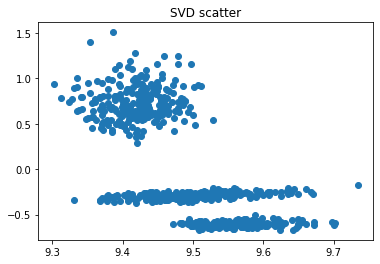

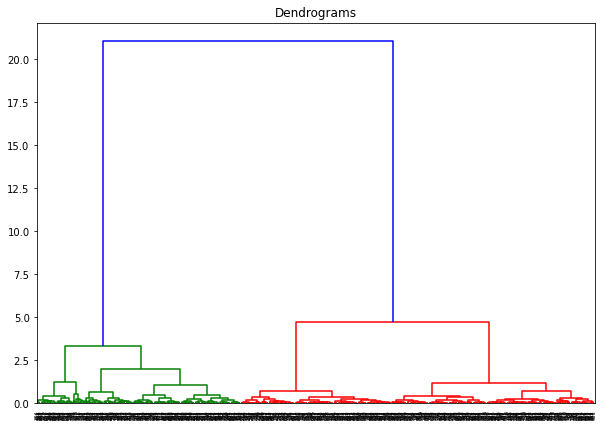


 Silhouette Score:  0.64159936

 Contingency Matrix: 
 [[ 36 134  17  78  25]
 [  2  80 162  13  17]
 [ 22  41  10  44  19]]

 Kappa score:  0.27147416624265686





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [136]:
hc_reduction("svd", X_train_D2V, y_train_D2V)

### T-SNE:

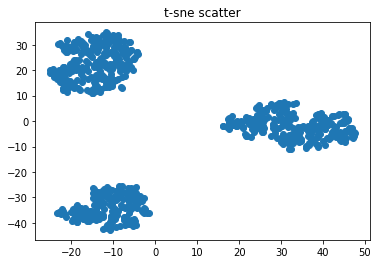

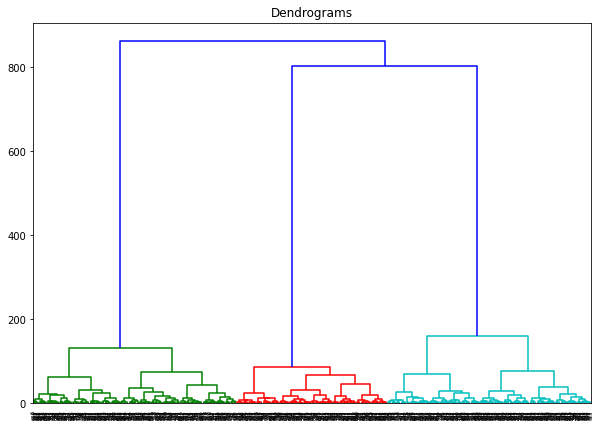


 Silhouette Score:  0.5478753

 Contingency Matrix: 
 [[162  26  41   6  39]
 [ 10  43  17  42  24]
 [  9  33  54  32  19]
 [  8  37  33  37  28]]

 Kappa score:  0.25825674598178683





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [137]:
hc_reduction("tsne", X_train_D2V, y_train_D2V)

#EM Clustering

In [138]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

def em_reduction(reduction, x, y, flag = None): #function that uses kmeans to cluster the data based on three types of reduction techniques.
  random.seed(555)
  if reduction == "tsne":
    tsne = TSNE(n_components=2, random_state=0)
    X = tsne.fit_transform(x)
    plt.scatter(X[:,0], X[:,1])
    plt.title("t-sne scatter")
    plt.show()
  if reduction == "normal":
    if flag == None:
      X = x.toarray()
    else: X = x
  if reduction == "svd":
    svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
    X = svd.fit_transform(x)
    plt.scatter(X[:,0], X[:,1])
    plt.title("SVD scatter")
    plt.show()
  
  gmm = GaussianMixture(n_components=5)
  gmm.fit(X)
  pred_y = gmm.predict(X)
  Y = np.array([[0.5],[0.5]])

  if reduction != "normal": 
    # plt.scatter(X[:,0], X[:,1])
    # plt.scatter(gmm.cluster_centers_[:, 0], gmm.cluster_centers_[:, 1], s=20, c='red')
    # plt.title('Clusters')
    # plt.show()
    x,ys = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
    XY = np.array([x.flatten(),ys.flatten()]).T
    means = gmm.means_ 
    covariances = gmm.covariances_
    fig = plt.figure()
    ax0 = fig.add_subplot(111)
    ax0.scatter(X[:,0],X[:,1])
    ax0.scatter(Y[0,:],Y[1,:],c='orange',zorder=10,s=100)
    for m,c in zip(means,covariances):
        multi_normal = multivariate_normal(mean=m,cov=c)
        ax0.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.5)
        ax0.scatter(m[0],m[1],c='red',zorder=10,s=100)
  
    plt.show()

  #labels = gmm.labels_
  print("\n Silhouette Score: ", silhouette_score(X, pred_y, metric='euclidean') )

 #This part of the function matches between the cluster label and the original classs by identifing the maximum number of records that hav the same class in each label
 #Then we change the number that represents that class with the same number that represent the label so that we will be able to calculate the kappa and the contengincy matrix
  y= pd.factorize(y)
  correcting_class= pd.DataFrame({"label":pred_y,"class":y[0]})

  lll=[]
  for i in range(5):
    lll.append(correcting_class.loc[correcting_class["class"]==i])
  for i in range(5):
    lll[i]["class"]=max(lll[i]["label"].mode())

  class_laabel_df=pd.DataFrame()
  for I in range(5):
    class_laabel_df=pd.concat([class_laabel_df, lll[I]], axis=0) 
  class_laabel_df

  print("\n Contingency Matrix: \n", contingency_matrix(class_laabel_df["class"], class_laabel_df["label"]))
  print("\n Kappa score: " ,cohen_kappa_score(class_laabel_df["class"], class_laabel_df["label"]))
  print("\n\n")
  return class_laabel_df


##EM Clustering using BOW

### Without Feature Reduction:

In [139]:
#em_reduction("normal", X_train_counts, y_train)

### SVD:

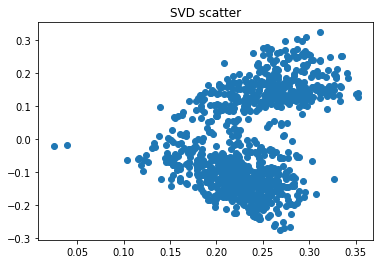

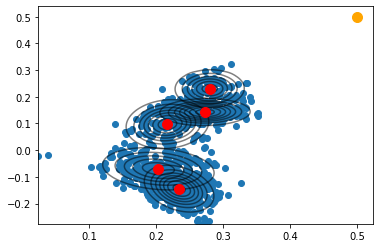


 Silhouette Score:  0.3954964242835761

 Contingency Matrix: 
 [[374   0  13   0 213]
 [  0 141  20  26  13]
 [  0  70  77  52   1]]

 Kappa score:  0.4264829912847906





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,2,2
1,2,2
2,2,2
3,1,2
4,3,2
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


In [140]:
em_reduction("svd", X_train_counts, y_train)


###T-SNE:

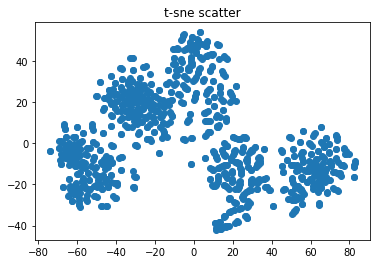

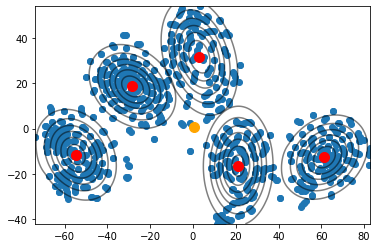


 Silhouette Score:  0.5206553

 Contingency Matrix: 
 [[184   0  16   0   0]
 [  1 199   0   0   0]
 [  1   0 197   2   0]
 [  0   2   0 198   0]
 [  0   0   0   0 200]]

 Kappa score:  0.9725





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
995,2,2
996,2,2
997,2,2
998,2,2


In [141]:
em_reduction("tsne", X_train_counts, y_train)

##EM Clustering using TF-IDF

### Without Feature Reduction:

In [142]:
#em_reduction("normal", X_train_tfidf, y_train)

### SVD:

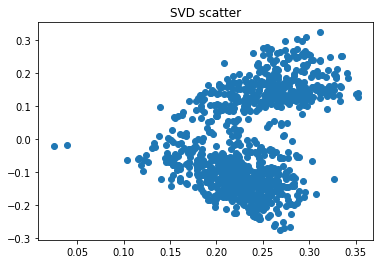

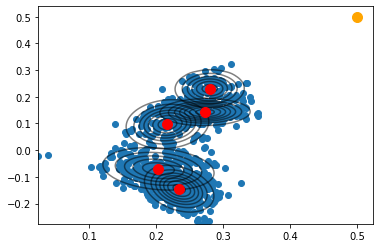


 Silhouette Score:  0.39469154624823044

 Contingency Matrix: 
 [[ 13 141  20   0  26]
 [  1  70  77   0  52]
 [217   0  13 370   0]]

 Kappa score:  0.42280750910619214





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,2,2
1,2,2
2,2,2
3,1,2
4,4,2
...,...,...
995,3,3
996,3,3
997,3,3
998,3,3


In [143]:
em_reduction("svd", X_train_tfidf, y_train)

### T-SNE

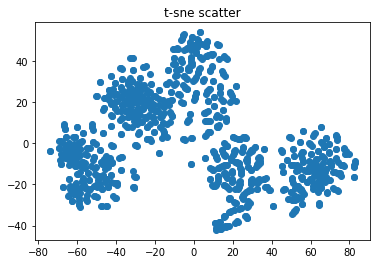

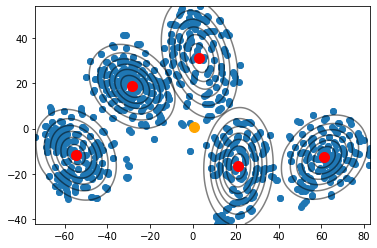


 Silhouette Score:  0.5206553

 Contingency Matrix: 
 [[197   2   0   0   1]
 [  0 198   0   2   0]
 [  0   0 200   0   0]
 [  0   0   0 199   1]
 [ 16   0   0   0 184]]

 Kappa score:  0.9725





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


In [144]:
em_reduction("tsne", X_train_tfidf, y_train)

##EM Clustering using n-gram

### Without Feature Reduction:

In [145]:
#em_reduction("normal", X_train_ngram, y_train)

### SVD:

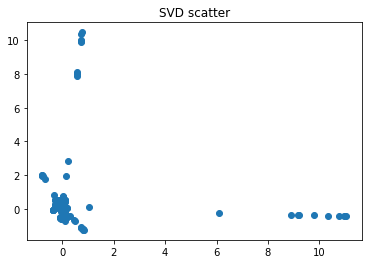

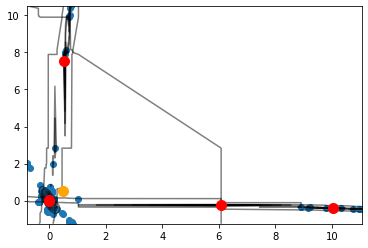


 Silhouette Score:  0.3795924770277976

 Contingency Matrix: 
 [[581   0   0 219   0]
 [ 11   8  10 170   1]]

 Kappa score:  0.4449398127507802





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,3,0
1,3,0
2,0,0
3,3,0
4,0,0
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


In [146]:
em_reduction("svd", X_train_ngram, y_train)

### T-SNE:

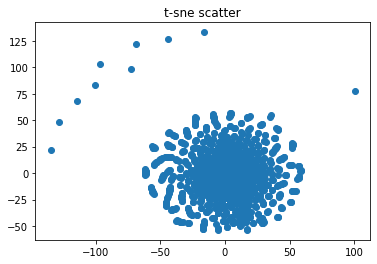

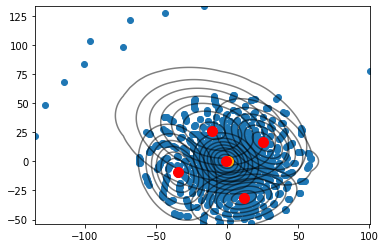


 Silhouette Score:  0.3319153

 Contingency Matrix: 
 [[125  49   9  11   6]
 [ 45 229  39  68  19]
 [  0   3 138  20  39]
 [  0  62   3 105  30]]

 Kappa score:  0.4628099173553719





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,3,3
1,4,3
2,3,3
3,3,3
4,3,3
...,...,...
995,0,0
996,1,0
997,1,0
998,0,0


In [147]:
em_reduction("tsne", X_train_ngram, y_train)

##EM Clustering using LDA

### Without Feature Reduction:

In [148]:
em_reduction("normal", X_train_LDA, y_train, 1)


 Silhouette Score:  -0.008232714535958594

 Contingency Matrix: 
 [[233  54 105 127  81]
 [ 86  60  69 148  37]]

 Kappa score:  0.11394217005439455





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,2,3
1,3,3
2,1,3
3,3,3
4,0,3
...,...,...
995,0,3
996,3,3
997,3,3
998,3,3


### SVD:

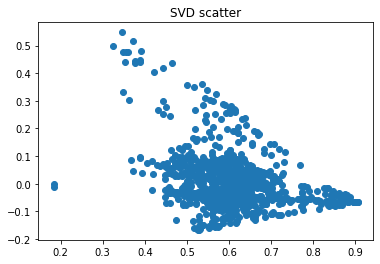

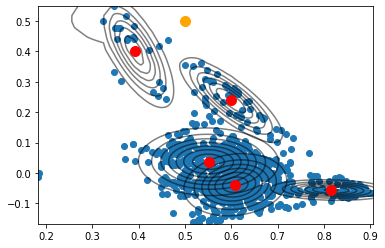


 Silhouette Score:  0.36672002482495564

 Contingency Matrix: 
 [[481 178  82  21  38]
 [ 89  90  11   0  10]]

 Kappa score:  0.1252039151712887





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,1,0
1,0,0
2,1,0
3,0,0
4,4,0
...,...,...
995,2,1
996,1,1
997,0,1
998,1,1


In [149]:
em_reduction("svd", X_train_LDA, y_train)

### T-SNE:

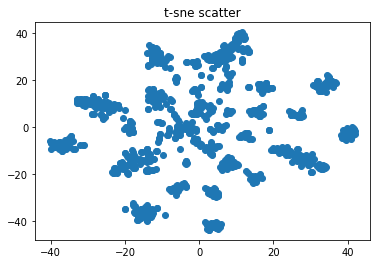

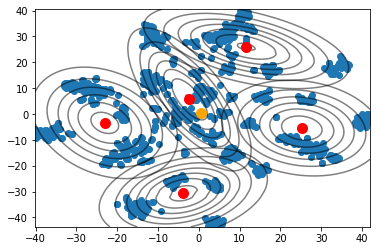


 Silhouette Score:  0.36422563

 Contingency Matrix: 
 [[132 111  70  30  57]
 [100  80  98 114 208]]

 Kappa score:  0.11788291900561354





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,0,4
1,4,4
2,3,4
3,3,4
4,2,4
...,...,...
995,0,4
996,4,4
997,4,4
998,4,4


In [150]:
em_reduction("tsne", X_train_LDA, y_train)

##EM Clustering using Doc2vec

### Without Feature Reduction:

In [151]:
em_reduction("normal", X_train_D2V, y_train_D2V, 1)


 Silhouette Score:  0.2802708

 Contingency Matrix: 
 [[134  70   6  69  11]
 [ 41  40   1  45   9]
 [ 80   5  63  27  99]]

 Kappa score:  0.18905860520276274





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,0,0
1,1,0
2,1,0
3,1,0
7,0,0
...,...,...
690,2,4
692,4,4
694,4,4
695,2,4


### SVD:

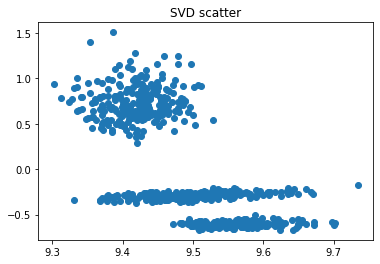

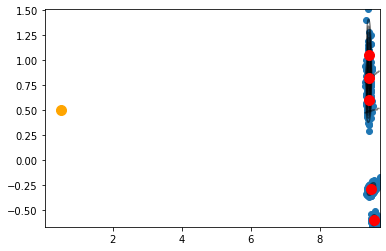


 Silhouette Score:  0.65839916

 Contingency Matrix: 
 [[162   6  80  26   0]
 [ 17  71 134  55  13]
 [ 10  36  41  42   7]]

 Kappa score:  0.2708669029970996





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,2,2
1,1,2
2,1,2
3,4,2
7,2,2
...,...,...
690,0,0
692,0,0
694,0,0
695,0,0


In [152]:
em_reduction("svd", X_train_D2V, y_train_D2V)

### T-SNE:

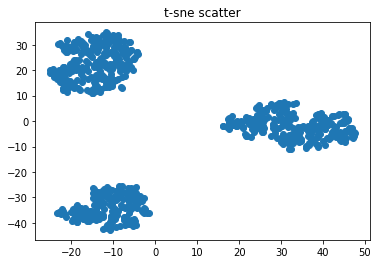

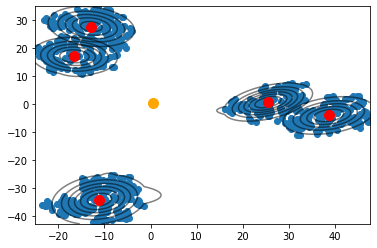


 Silhouette Score:  0.5481242

 Contingency Matrix: 
 [[ 25  43  10  42  16]
 [ 41  27 162   5  39]
 [ 30  37   8  37  31]
 [ 18  36   9  29  55]]

 Kappa score:  0.26128626793757204





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label,class
0,4,3
1,3,3
2,3,3
3,3,3
7,4,3
...,...,...
690,2,2
692,2,2
694,2,2
695,2,2


In [153]:
em_reduction("tsne", X_train_D2V, y_train_D2V)

#Missclasification cases






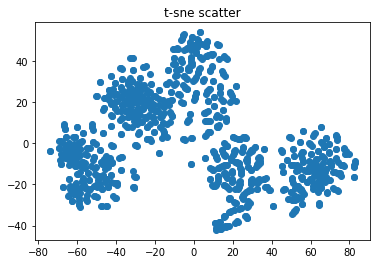

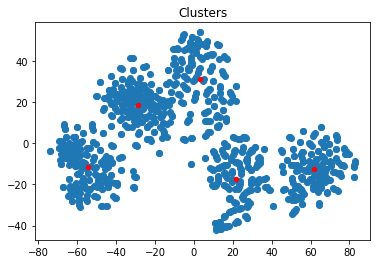


 Silhouette Score:  0.52219236

 Contingency Matrix: 
 [[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   2 187   0  11]
 [  0   2   1 197   0]
 [  0   2   1   0 197]]

 Kappa score:  0.97625





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,label name,sample,label,class
0,The Meaning of Truth,oppon might say intellect kind slush make repl...,3,3
1,The Meaning of Truth,function grow wish account shall true whether ...,3,3
2,The Meaning of Truth,india sit exactli mean say know tiger precis f...,3,3
3,The Meaning of Truth,beyond sound know realiti faintest fragmentari...,3,3
4,The Meaning of Truth,men seek spread belief awaken imit infect othe...,3,3
...,...,...,...,...
995,Indiana,white hand buri black hair indiana impuls tri ...,4,4
996,Indiana,indulg oblig mentor accommod passion interest ...,4,4
997,Indiana,accomplish play passion well deceiv shame upon...,4,4
998,Indiana,care protect humili certain overwhelm must giv...,4,4


In [154]:
df_error=df
df_error = df_error.rename(columns={'label': 'label name'})
# df_error
ggg=kmeans_reduction("tsne", X_train_tfidf, y_train)
# ggg
dfg=pd.DataFrame()
dfg=pd.concat([df_error,ggg], axis=1)
dfg


In [155]:
def get_misclassified(dfg):
  dfg=dfg.rename(columns={'label': 'predicted_class'})
  dfg=dfg.sort_values('class')
  return dfg[dfg['predicted_class'] != dfg['class']]

dfg=get_misclassified(dfg)
dfg

,label name,sample,predicted_class,class
703,Notes from the Underground,would torment make feel know may torment man p...,4,2
785,Notes from the Underground,piti woman know wrong heart fail suffer love l...,4,2
756,Notes from the Underground,afterward lay futur children grow feel exampl ...,4,2
758,Notes from the Underground,realli exist someth dearer almost everi man gr...,1,2
759,Notes from the Underground,talk like truli must unlucki h sort thing most...,4,2
770,Notes from the Underground,love holi mysteri ought hide eye whatev happen...,4,2
627,Notes from the Underground,perhap anoth thing liza man fond reckon troubl...,4,2
637,Notes from the Underground,mere logic exercis ye logic exercis maintain t...,1,2
617,Notes from the Underground,anoth circumst worri day one like unlik anyon ...,4,2
621,Notes from the Underground,liza man fond reckon troubl count joy count ou...,4,2


In [156]:
# df_part = dfg.loc[dfg['right_label'] == "Notes from the Underground"]
# df_part
def describe_error():
    for k in range(5):
      if len(dfg.loc[dfg['class'] == k])>0:
        class_name = dfg['label name'][dfg['class'] == k].iloc[0]
        df_part = dfg.loc[dfg['class'] == k]
        records = ' '.join(df_part['sample'])
        tokenized_word=nltk.word_tokenize(records)
        fdist = FreqDist(tokenized_word)
        print(fdist)
        print(fdist.most_common(2))
        
        fdist.plot(35,title=("Words that are more likely to be misclassified related to the class: ", class_name),cumulative=False)
        plt.show()
        print("\t")
        wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
        wc = wc.generate(str(records))
        #fig = plt.figure(num=1)
        plt.axis('off')
        plt.imshow(wc, cmap=None)
        #plt.title(f"y=%d$^x$" % num)
        #'Step in $e$: {};'.format(class_name)
        plt.show()

# df_part

##Discribing the frequency of the words in the missclasification cases for each class

<FreqDist with 549 samples and 1950 outcomes>
[('love', 66), ('one', 47)]


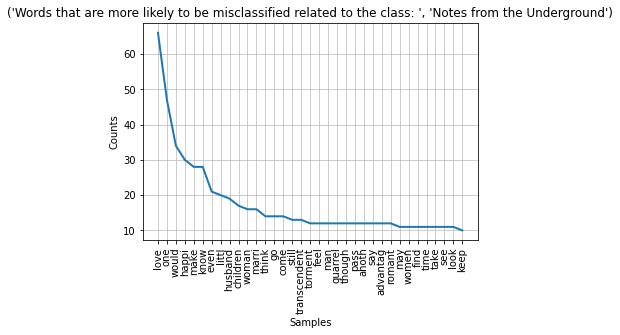

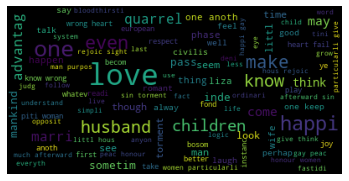

<FreqDist with 229 samples and 450 outcomes>
[('la', 10), ('de', 10)]


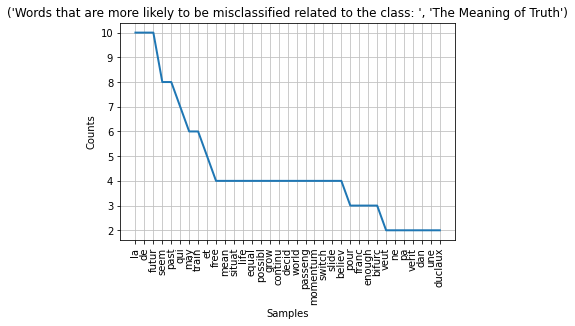

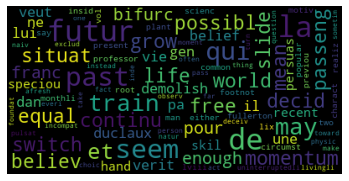

<FreqDist with 356 samples and 450 outcomes>
[('upon', 6), ('write', 5)]


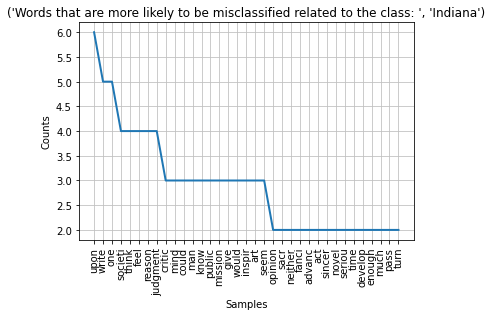

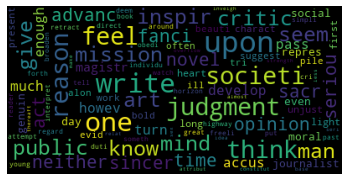

In [157]:
describe_error()
